In [1]:
# model training using tensorflow
from tqdm import tqdm
import numpy as np
import os
import cv2
from matplotlib import pyplot

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
'''
Configuration Code
'''
def get_n_cores():
    """The NSLOTS variable, If NSLOTS is not defined throw an exception."""
    nslots = os.getenv("NSLOTS")
    if nslots is not None:
        return int(nslots)
    raise ValueError("Environment variable NSLOTS is not defined.")


os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"

NUM_GPUS = len(tf.config.experimental.list_physical_devices("GPU"))
print("Num GPUs Available: ", NUM_GPUS)
if NUM_GPUS > 0:
    print(os.getenv("CUDA_VISIBLE_DEVICES"))

tf.config.set_soft_device_placement(True)
tf.keras.backend.set_floatx("float32")
tf.config.threading.set_intra_op_parallelism_threads(1)
tf.config.threading.set_inter_op_parallelism_threads(get_n_cores())

Num GPUs Available:  1
0


In [3]:
batch_size = 32

DATA_DIRECTORY = os.path.join(os.getcwd(), 'data', 'formatted_data')

size = (224,224) # height, width

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  DATA_DIRECTORY,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=size,
  batch_size=batch_size
)



Found 3000 files belonging to 2 classes.
Using 2400 files for training.


In [4]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  DATA_DIRECTORY,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=size,
  batch_size=batch_size
)

Found 3000 files belonging to 2 classes.
Using 600 files for validation.


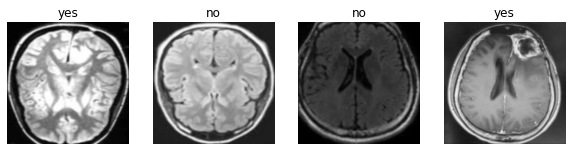

In [5]:
class_names = train_ds.class_names

pyplot.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(4):
        ax = pyplot.subplot(1, 4, i + 1)
        pyplot.imshow(images[i].numpy().astype("uint8"))
        pyplot.title(class_names[labels[i]])
        pyplot.axis("off")
pyplot.show()

In [6]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255, input_shape=(224,224,3))

In [7]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(224,224,3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

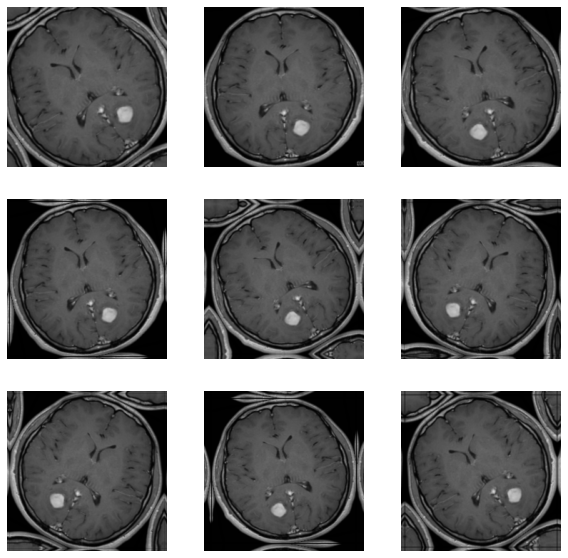

In [9]:
'''
Plot some of the augmented images
'''
pyplot.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = pyplot.subplot(3, 3, i + 1)
        pyplot.imshow(augmented_images[0].numpy().astype("uint8"))
        pyplot.axis("off")

In [20]:
num_classes = 2

model = Sequential([
    data_augmentation,
    normalization_layer,
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

In [21]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
 )

In [22]:
epochs=100
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/100
75/75 [==============================] - 4s 58ms/step - loss: 0.7944 - accuracy: 0.5392 - val_loss: 0.6679 - val_accuracy: 0.5483
Epoch 2/100
75/75 [==============================] - 4s 55ms/step - loss: 0.6469 - accuracy: 0.6342 - val_loss: 0.6333 - val_accuracy: 0.6300
Epoch 3/100
75/75 [==============================] - 4s 55ms/step - loss: 0.5696 - accuracy: 0.7158 - val_loss: 0.4722 - val_accuracy: 0.7883
Epoch 4/100
75/75 [==============================] - 5s 61ms/step - loss: 0.5084 - accuracy: 0.7608 - val_loss: 0.4596 - val_accuracy: 0.7850
Epoch 5/100
75/75 [==============================] - 5s 60ms/step - loss: 0.4849 - accuracy: 0.7788 - val_loss: 0.3882 - val_accuracy: 0.8267
Epoch 6/100
75/75 [==============================] - 5s 60ms/step - loss: 0.4583 - accuracy: 0.7833 - val_loss: 0.3601 - val_accuracy: 0.8533
Epoch 7/100
75/75 [==============================] - 4s 60ms/step - loss: 0.4585 - accuracy: 0.7896 - val_loss: 0.4161 - val_accuracy: 0.8000
Epoch 

75/75 [==============================] - 4s 56ms/step - loss: 0.0894 - accuracy: 0.9717 - val_loss: 0.1251 - val_accuracy: 0.9667
Epoch 59/100
75/75 [==============================] - 4s 55ms/step - loss: 0.0912 - accuracy: 0.9671 - val_loss: 0.1745 - val_accuracy: 0.9633
Epoch 60/100
75/75 [==============================] - 4s 55ms/step - loss: 0.0690 - accuracy: 0.9775 - val_loss: 0.1471 - val_accuracy: 0.9667
Epoch 61/100
75/75 [==============================] - 4s 55ms/step - loss: 0.0715 - accuracy: 0.9754 - val_loss: 0.1431 - val_accuracy: 0.9667
Epoch 62/100
75/75 [==============================] - 4s 55ms/step - loss: 0.0793 - accuracy: 0.9708 - val_loss: 0.1240 - val_accuracy: 0.9667
Epoch 63/100
75/75 [==============================] - 4s 55ms/step - loss: 0.0853 - accuracy: 0.9725 - val_loss: 0.2662 - val_accuracy: 0.9267
Epoch 64/100
75/75 [==============================] - 4s 55ms/step - loss: 0.0837 - accuracy: 0.9663 - val_loss: 0.1347 - val_accuracy: 0.9700
Epoch 65/100

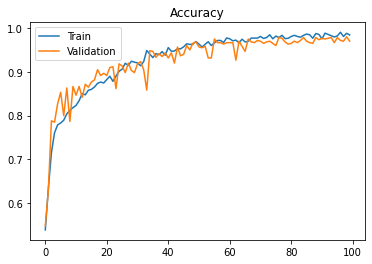

In [23]:
'''
Plot the accuracy
'''
pyplot.title("Accuracy")
pyplot.plot(range(epochs), history.history['accuracy'], label = "Train")
pyplot.plot(range(epochs), history.history['val_accuracy'], label = "Validation")
pyplot.legend()
pyplot.show()

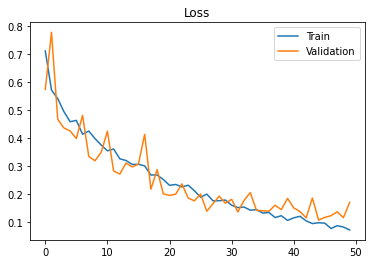

In [19]:
'''
Plot the loss
'''
pyplot.title("Loss")
pyplot.plot(range(epochs), history.history['loss'], label = "Train")
pyplot.plot(range(epochs), history.history['val_loss'], label = "Validation")
pyplot.legend()
pyplot.show()

In [25]:
'''
Try the test set
'''

TEST_DIRECTORY = os.path.join(os.getcwd(), 'backup_data', 'formatted_data')

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  TEST_DIRECTORY,
  seed=123,
  image_size=size,
)

Found 253 files belonging to 2 classes.


In [27]:
model.save('models/model_tf_100')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: models/model_tf_100/assets


In [33]:
model.evaluate(test_ds, return_dict=True)


8/8 [==============================] - 0s 9ms/step - loss: 0.2256 - accuracy: 0.9723


{'loss': 0.22558604180812836, 'accuracy': 0.9723320007324219}